# Analyzing Cardiac data: Examining Health Factors To Predict The Presence of Heart Disease


### Introduction

Millions of people are affected by heart diseases every year.  It is the most prominent cause of death globally, taking over “17.9 million lives each year” (WHO).  Heart disease is the umbrella term referring to various conditions, such as coronary artery disease, cerebrovascular disease, peripheral artery disease, and aortic atherosclerosis.  Cholesterol and blood pressure are often linked with the risk of heart disease. Cholesterol is a lipophilic molecule and does not easily dissolve in blood. Excess amounts of cholesterol can contribute to the formation of atherosclerotic plaques, which can lead to coronary artery disease. High blood pressure makes the heart work more to pump blood as the artery walls are too high due to the force of the blood being pushed against it. As people age, their bodies become less able to manage both cholesterol and blood pressure levels.
<br><br>
The other variables included in the heart disease data set were not included in our analysis for several reasons.  The first is that we wanted to pick the predictor variables that we know from previous research to likely have the strongest relationship in indicating heart disease.  Some of the variables that the data set included, also could be an indication of a different disease such as diabetes (an example being fasting blood sugar variable).  The last reason is because the clasisfier may not perform well if there are too many predictors due to an overload of data.
<br><br>
Taking this into account, can we diagnose a patient with heart disease based on their resting blood pressure, serum cholesterol, and age?  We will be using the Cleveland database, from the UCI Machine Learning Repository’s heart disease data set to answer this predictive question.
<br><br>
Our variables of interest:
- **age**: patient age in years
- **restbps**: patient's resting blood pressure, measured in mm Hg
- **chol**: patient's cholesterol levels, measured in mg/dL

### Preliminary Exploratory Data Analysis

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

We begin our analysis by first reading our database. The database assigns its heart disease diagnoses under the `num` column as a value of 0 to 4, where any number more than 0 indicates the presence of heart disease. Because we will only be interested in whether or not a patient has heart disease, we added a new column `diag` that returns "No" if `num` is 0 (patient does NOT have heart disease), and "Yes" for all other values.

In [2]:
heartdisease_link <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heartdisease_data <- read_csv(heartdisease_link, col_names = FALSE) |>
    rename(age = X1,
           sex = X2,
           cp = X3,
           restbps = X4,
           chol = X5,
           fbs = X6,
           restecg = X7,
           thalach = X8,
           exang = X9,
           oldpeak = X10,
           slope = X11,
           ca = X12,
           thal = X13,
           num = X14) |>
    mutate(diag = case_when(num == 0 ~ "No",
                            TRUE ~ "Yes"))
heartdisease_data$diag <- as.factor(heartdisease_data$diag)

glimpse(heartdisease_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 303
Columns: 15
$ age     <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, 52, 57…
$ sex     <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,…
$ cp      <dbl> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, 3, 2, 1,…
$ restbps <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 13…
$ chol    <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 25…
$ fbs     <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,…
$ restecg <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,…
$ thalach <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 14…
$ exang   <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,…
$ oldpeak <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, 0.…
$ slope   <dbl> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2,…
$ ca      <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0", "0.0", "1.0",…
$ thal    <chr> "6

Next, we split our dataframe into a training and testing set, the former of which will be analyzed for our selected predictor variables. As evidenced by the number of rows in the glimpsed table, 75% of the data went into our training set.

In [3]:
heartdisease_split <- initial_split(heartdisease_data, prop = 0.75, strata = num)
heartdisease_train <- training(heartdisease_split)
heartdisease_test <- testing(heartdisease_split)

glimpse(heartdisease_train)

Rows: 226
Columns: 15
$ age     <dbl> 37, 41, 56, 57, 57, 56, 44, 57, 48, 49, 64, 58, 50, 58, 66, 43…
$ sex     <dbl> 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,…
$ cp      <dbl> 3, 2, 2, 4, 4, 2, 2, 3, 3, 2, 1, 1, 3, 3, 1, 4, 4, 3, 4, 3, 1,…
$ restbps <dbl> 130, 130, 120, 120, 140, 140, 120, 150, 130, 130, 110, 150, 12…
$ chol    <dbl> 250, 204, 236, 354, 192, 294, 263, 168, 275, 266, 211, 283, 21…
$ fbs     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,…
$ restecg <dbl> 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ thalach <dbl> 187, 172, 178, 163, 148, 153, 173, 174, 139, 171, 144, 162, 15…
$ exang   <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,…
$ oldpeak <dbl> 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 1.6, 0.2, 0.6, 1.8, 1.0, 1.…
$ slope   <dbl> 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 3, 1, 2, 1, 1, 2, 1,…
$ ca      <chr> "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0", "0.0",…
$ thal    <chr> "3

As part of our exploratory analysis, we also summarized our dataframe to display the mean of each of our selected predictor variables according to the patient diagnosis. As expected, patients diagnosed with heart disease were, on average, older than those diagnosed without it, and had higher cholesterol and resting blood pressure.

In [4]:
heartdisease_means <- heartdisease_train |>
    group_by(diag) |>
    summarize(age_mean = mean(age, na.rm = TRUE),
             restbps_mean = mean(restbps, na.rm = TRUE),
             chol_mean = mean(chol, na.rm = TRUE))

heartdisease_means

diag,age_mean,restbps_mean,chol_mean
<fct>,<dbl>,<dbl>,<dbl>
No,52.09756,128.9512,243.7317
Yes,55.94175,134.2913,250.6893


Individual histograms were made for each predictor variable, to see how they lined up with the patient diagnoses. Here, unexpected results emerged. While it was evident that older patients had more heart disease diagnoses than younger patients, no clear correlations could be found for the cholesterol and resting blood pressure predictors.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



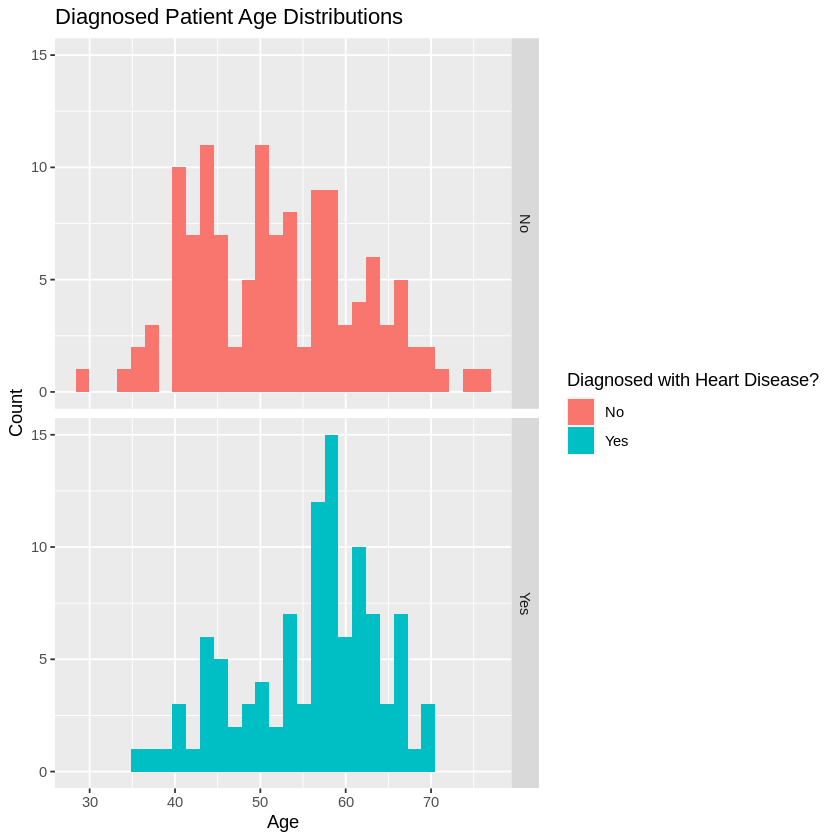

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



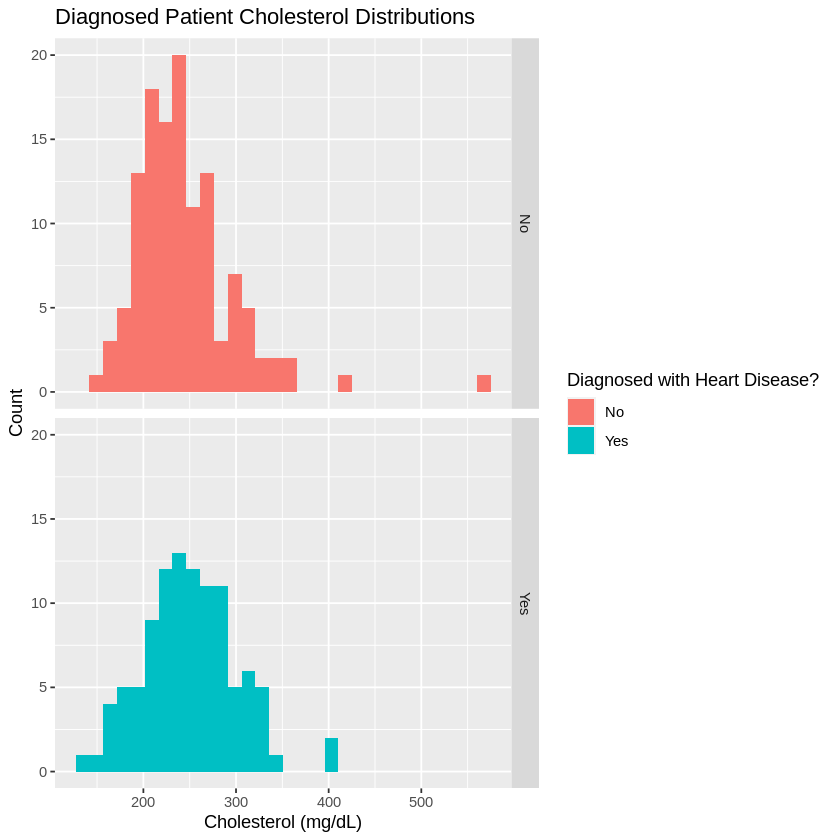

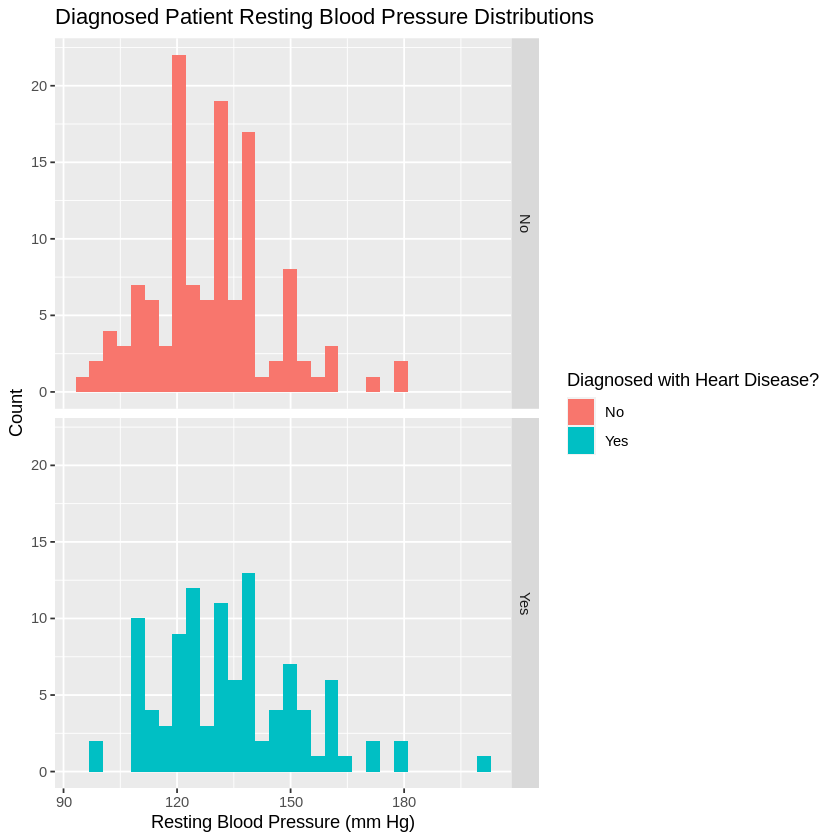

In [5]:
# visualizing the age predictor
train_plot_age <- heartdisease_train |>
    ggplot(aes(x = age, fill = diag)) + 
    geom_histogram(position = "identity") + 
    labs(x = "Age",
         y = "Count",
         fill = "Diagnosed with Heart Disease?",
         title = "Diagnosed Patient Age Distributions") + 
    facet_grid(rows = vars(diag))
train_plot_age

# visualizing the cholesterol predictor
train_plot_chol <- heartdisease_train |>
    ggplot(aes(x = chol, fill = diag)) + 
    geom_histogram(position = "identity") + 
    labs(x = "Cholesterol (mg/dL)",
         y = "Count",
         fill = "Diagnosed with Heart Disease?",
         title = "Diagnosed Patient Cholesterol Distributions") + 
    facet_grid(rows = vars(diag))
train_plot_chol

# visualizing the blood pressure predictor
train_plot_bps <- heartdisease_train |>
    ggplot(aes(x = restbps, fill = diag)) + 
    geom_histogram(position = "identity") + 
    labs(x = "Resting Blood Pressure (mm Hg)",
         y = "Count",
         fill = "Diagnosed with Heart Disease?",
         title = "Diagnosed Patient Resting Blood Pressure Distributions") + 
    facet_grid(rows = vars(diag))
train_plot_bps

Comparing age with our two other predictor variables in scatterplots did not show any strong correlations or visible clusters either:

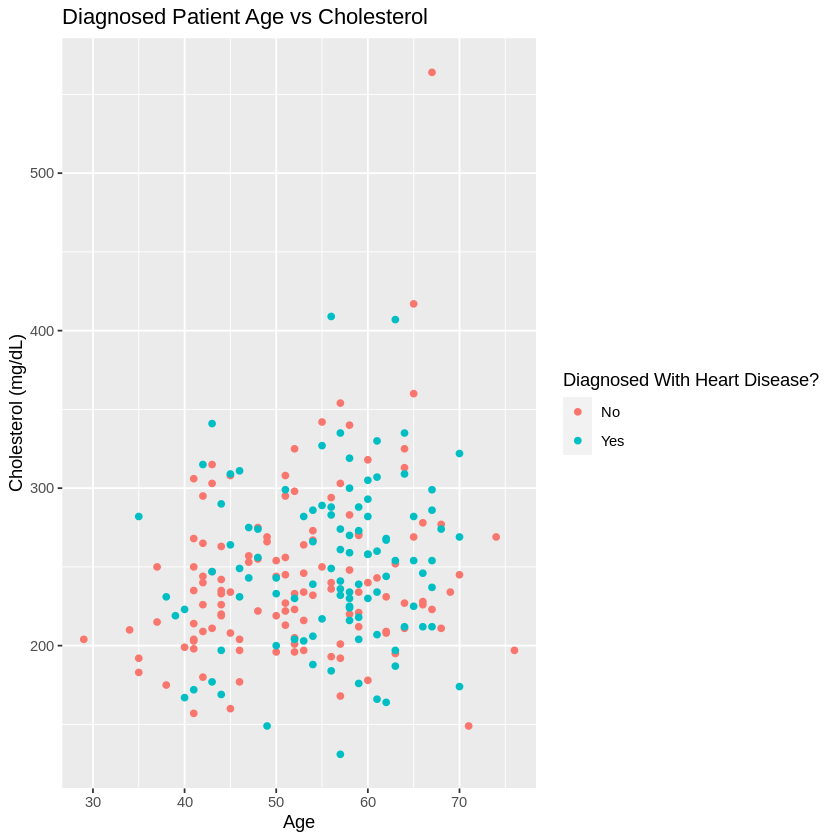

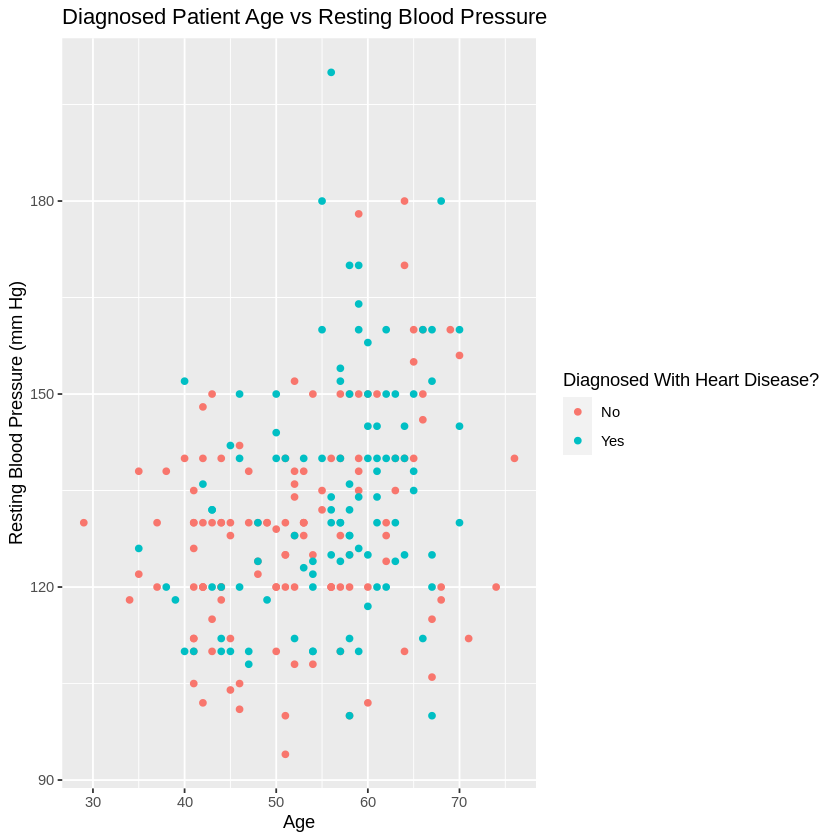

In [6]:
train_plot_age_chol <- heartdisease_train |>
    ggplot(aes(x = age, y = chol, color = diag)) + 
    geom_point() + 
    labs(x = "Age",
         y = "Cholesterol (mg/dL)",
         color = "Diagnosed With Heart Disease?",
         title = "Diagnosed Patient Age vs Cholesterol")
train_plot_age_chol

train_plot_age_bps <- heartdisease_train |>
    ggplot(aes(x = age, y = restbps, color = diag)) + 
    geom_point() + 
    labs(x = "Age",
         y = "Resting Blood Pressure (mm Hg)",
         color = "Diagnosed With Heart Disease?",
         title = "Diagnosed Patient Age vs Resting Blood Pressure")
train_plot_age_bps

### Methods

The variables that we will be examining to predict the presence of heart disease include resting blood pressure, serum cholesterol, and age. We can determine this by using the “classification” method. This will involve processes like creating “recipes”, training the data, as well as making a workflow. To make the analysis of this question more simple, we will likely plot out our manipulated data in the form of a scatter plot. This visualization will make it clear whether or not the patient has heart disease. By using colors and labels to organize our scatter plot we will be better able to analyze our data.

### Expected Outcomes and Significance

After plotting our data, we expect to find the presence of heart disease in older patients. We expected to find this diagnosis among patients with higher cholesterol and/or resting blood pressure as well, but our exploratory data analysis seemed to indicate otherwise. These findings are confusing, but could be vital in saving the lives of patients as heart disease can be deadly if left untreated, but manageable with proper treatment.

According to our research, typically people with higher blood sugar and cholesterol are more at risk for heart disease. However, according to our data, no such correlation could be found. After our classifier is built, we will be able to confirm whether or no these predictors are truly unable to accurately diagnose a patient with heart disease.

### Results

Below we set the seed for reproducible results
Here we are scaling and centering the variables “chol”, “restbps” and “age” in the training data “heartdisease_train” to make sure that no variable has more influence on data than the other. This means “heartdisease_train” will have a standard deviation of 1 and a mean of 0. We then prep the data which calculates the mean of the variables so that we can scale and center the data correctly.
Here we are baking the data which takes our prepped data “hd_recipe” and standardizing the data.
Here we are creating our specifications for our workflow. We make sure to use the weight function “rectangular” which specifies to use a straight line distance so that each variable only has one vote. When we specify neighbors to equal tune() we specify that the K value can be changed during the tuning process, this also means our code will record the accuracy of our predictions for each K value. We also make sure to specify that this is a classification problem, as in we are trying to predict a factor rather than a numeric value.

In [7]:
set.seed(1)

hd_recipe <- recipe(diag ~ chol + restbps + age, data = heartdisease_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    prep()

preprocessed_data <- hd_recipe |> 
                        bake(heartdisease_data)

knn_spec <-nearest_neighbor(weight_func= "rectangular", neighbors= tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

hd_fit <- workflow() |>
                   add_recipe(hd_recipe) |>
                   add_model(knn_spec) |>
                   fit(data = heartdisease_train)

hd_test_predictions <- predict(hd_fit, heartdisease_test) |>
  bind_cols(heartdisease_test)

Warning message:
“tune samples were requested but there were 226 rows in the data. 221 will be used.”


After setting up the data for building our classifier, we needed to figure out how many nearest neighbors could be used to best predict a patient’s diagnosis. Using too few neighbors would be too easily affected by fluctuations and stray data points, leading to underfitting, whereas using too many would overfit and fail to account for any nuance in the dataset. 
In hd_vfold we specify to use 5-fold cross validation on the “heardisease_train” also specifying to stratify the data “diag” meaning training and validation subsets will have around the same proportions of observations for each category.
In knn_results we try all the possible combinations of K values we specified in k_vals for all the resamples.
We then filter out the metric “accuracy” in which we then find the K value with the highest accuracy.
We then graph the K values vs their accuracies to ensure that the K value we found matches with the graph.


max_accuracy,k_value
<dbl>,<dbl>
0.6156126,26
0.6156126,31


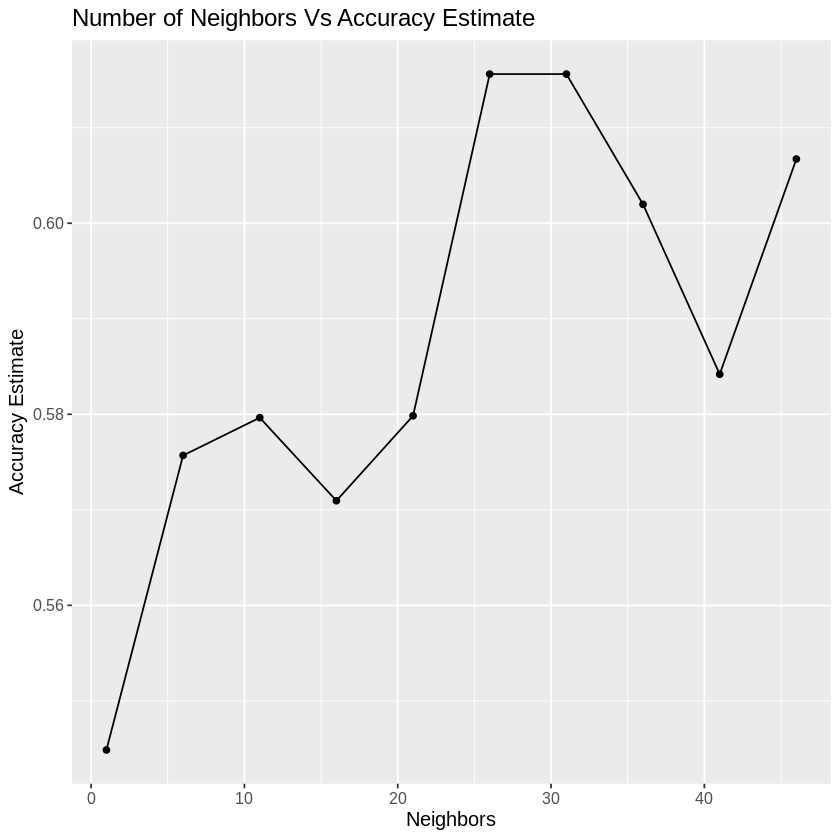

In [8]:
### Finding best k value

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 5))

hd_vfold <- vfold_cv(heartdisease_train, v = 5, strata = diag)

knn_results <- workflow() |>
  add_recipe(hd_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = hd_vfold, grid = k_vals) |>
  collect_metrics() 

accuracies <- knn_results |>
  filter(.metric == "accuracy")

k_value_with_best_accuracy <- accuracies |> 
summarize(max_accuracy = max(mean), k_value = neighbors[which(mean == max(mean))])

k_value_with_best_accuracy

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
ggtitle("Number of Neighbors Vs Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

After determining the best value for K= 26 neighbors, we can start building our model specification and recipe, then combine them into the workflow “hd_new_fit”. We specify that we want the straight-line distance by using the weight function “rectangular”. We also state that we are using a classification problem by setting the set mode function to “classification”. Finally, we use the fit function with our training dataset “heartdisease_train”  to build the classifier. 

In [9]:
### Building a model with the best value for K

hd_new_spec <- nearest_neighbor(weight_func= "rectangular", neighbors= 26) |>
    set_engine("kknn") |>
    set_mode("classification")
hd_new_spec

hd_new_fit <- workflow() |>
       add_recipe(hd_recipe) |>
       add_model(hd_new_spec) |>
       fit(data= heartdisease_train)    
hd_new_fit

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 26
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(26,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4247788
Best kernel: rectangular
Best k: 26

Now that we have our classification algorithm we can make our predictions on the testing dataset using “heartdisease_test”  By using the bind_cols function we can add the predictions to our testing data, making it easy for us to visualize the predicted values from the classifier next to the true diagnosis. We then need to assess the classifier’s accuracy which is done by using the metrics function. The confusion matrix used here is simply so that we can get a table of predicted labels and correct labels, showing us where the metrics got its results from. Here, the confusion matrix shows that 20 of the diagnoses correctly predicted patients without heart disease, while another 22 accurately diagnosed patients with heart disease, for a total of 42 correct predictions. Out of a total of 77 predictions, our classifier made correct diagnoses 55% of the time.

In [10]:
### Predictions
hd_predictions <- predict(hd_new_fit , heartdisease_test) |>
       bind_cols(heartdisease_test)

hd_metrics <- hd_predictions |>
         metrics(truth = diag, estimate = .pred_class) 
hd_metrics

hd_confusion_matrix <- hd_predictions |> 
       conf_mat(truth = diag, estimate = .pred_class)
hd_confusion_matrix

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6753247
kap,binary,0.3533759


          Truth
Prediction No Yes
       No  26  10
       Yes 15  26

### Discussion

The dataset used for this project was the UCI Machine Learning Repository’s heart disease data set from the Cleveland database. We wanted to know if we can diagnose a patient with heart disease based on their resting blood pressure, serum cholesterol, and age, because these variables are typically connotated with indicators or even factors that cause heart disease. However, our exploratory data analysis found no correlation between heart disease and the chosen variables, nor was there any visible clustering among the variables when graphed on scatter plots.  The results obtained unfortunately do not do a good job of answering our predictive question, which we found relatively surprising due to the fact the predictor variables are usually closely tied to heart disease. These questionable results were even more evident when we built our classifier from these variables, which we used as our predictors.  Using the training dataset we performed our exploratory data analysis on to build our classifier, evaluating it on the testing set revealed that it was only accurate 55% of the time.   This shows that the classifier model is not reliable in predicting heart disease in patients, as its accuracy value is far too low to consider using in real life applications.
<br><br>
This finding would not be of great significance in the healthcare field because it is so unreliable.  It could not be used to predict the presence of heart disease in a patient.  If it was to be used the effects could be detrimental and result in serious consequences as there would be numerous patients misdiagnosed.  This is of course important to note, as in recognizing the classifier is not a great model, we know that it shouldn’t be used in this setting.
<br><br>
Further questions that could be developed from this project could focus on how the variables relate to each other and finding a meaningful correlation between them.  Researching each of the variables could lead to an attempt at establishing the range of these variables, and  how many people they affect.
<br><br>
Overall this study does not answer our predictive question.  It is not possible to accurately determine whether a patient has or doesn’t have heart disease based on these predictors.  The classifier accuracy makes sense with the graphs in our study, as no clear correlation could be found. 


### References 

Clark, L. T. (1986, August). Cholesterol and heart disease: Current concepts in pathogenesis and treatment. Journal of the National 
   Medical Association. 
   Retrieved April 12, 2023, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2571342/ 
    
Zhang, Y., Vittinghoff, E. et al.(2019, July 23). Associations of blood pressure and&nbsp;cholesterol levels during young&nbsp;adulthood 
    with later&nbsp;cardiovascular events. 
    Journal of the American College of Cardiology. Retrieved April 12, 2023, from 
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6764095/